To start working with keras and tensorflow you are to install these libraries.
To do it use 
* $ pip install --user tensorflow keras

Thus you won't face troubles which sometimes occur while installing tensorflow (EnvironmentError) bounded with denied permission.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [9]:
#if google MNIST data-set u'll see, that there are 4 data files: trainig set images, training labels
#test set images, test set labels
(X_train,y_train), (X_test, y_test) = mnist.load_data()

In [16]:
X_test.shape

(10000, 28, 28)

In [15]:
X_train.shape

(60000, 28, 28)

In [18]:
X_train[0] #this is a number 10000 numbers made of 28x28 matrix of pixels

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [19]:
y_train[0]

5

In [23]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [24]:
X_train[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

One-Hot Encode the targets ( y_trainand y_test) to fit the model. Essentially we will be converting these data sets into a set of 10 numbers to input into the neural network. Once done we will print the new label of the train set for the first image.

In [25]:
#One-Hot Encoding
#tf.keras.utils.to_categorical - Returns:
#A binary matrix representation of the input. The classes axis is placed last.
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

#Print the new label
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [26]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

**as first layer in a sequential model:**
* model = Sequential()
* model.add(Dense(32, input_shape=(16,)))

**now the model will take as input arrays of shape (*, 16)**
**and output arrays of shape (*, 32)**

**after the first layer, you don't need to specify**
**the size of the input anymore:**
* model.add(Dense(32))

**Note:** when using the categorical_crossentropy loss, your targets should be in categorical format (e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that is all-zeros except for a 1 at the index corresponding to the class of the sample). In order to convert integer targets into categorical targets, you can use the Keras utility to_categorical

In [27]:
#Compile the model 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
hist = model.fit(X_train, y_train_one_hot, validation_data=(X_test, y_test_one_hot), epochs=3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 64s 1ms/step - loss: 0.2698 - accuracy: 0.9487 - val_loss: 0.0895 - val_accuracy: 0.9732
Epoch 2/3
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0730 - accuracy: 0.9777 - val_loss: 0.0741 - val_accuracy: 0.9796
Epoch 3/3
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0482 - accuracy: 0.9848 - val_loss: 0.0927 - val_accuracy: 0.9747


**accuracy** - 98,48% - accurate on the training data (predict, using X_train (=y_train_one_hot results)) **val_accuracy** and 97.68% accurate on the test data (predict, using X_test and tru results - y_test_one_hot)

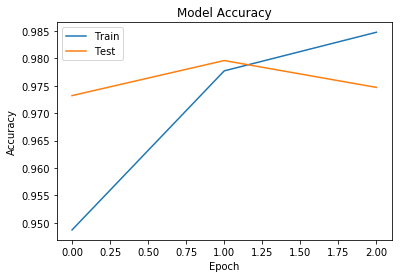

In [31]:
#Visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [40]:
#Predictions
predictions = model.predict(X_test[:4])
predictions
# Count from 0
#7 (1.0000000e+00 7th place (0-9)),2 (9.9999952e-01 (2nd place)) ,
#1 (9.9999774e-01), 0 (9.9999988e-01) - predicted numbers

array([[6.4501259e-11, 6.1184328e-15, 2.2068760e-12, 4.8873072e-11,
        3.8085257e-15, 1.1706838e-13, 3.3900839e-17, 1.0000000e+00,
        2.2502493e-11, 2.3871330e-10],
       [3.7298139e-07, 1.2535865e-08, 9.9999952e-01, 3.8010461e-09,
        7.2945740e-11, 9.9322633e-13, 1.7121003e-08, 5.5863466e-14,
        1.3311180e-07, 1.7820215e-12],
       [5.3696878e-09, 9.9999774e-01, 4.2830017e-08, 2.8272137e-10,
        3.8463108e-07, 9.5640956e-08, 9.0259054e-09, 1.0412107e-07,
        1.5931723e-06, 2.0473960e-09],
       [9.9999988e-01, 1.7562474e-14, 8.8367225e-09, 9.2202548e-12,
        1.5118982e-08, 1.4272128e-09, 9.9718882e-08, 1.0054129e-10,
        3.6200216e-11, 1.0667131e-09]], dtype=float32)

The probabilities are pretty hard to read. To understand them you must count **find the highest number in the set and then count the index that the number is to figure out what the label is which is the index number.** For example in the image above for the 3rd image, the highest probability is 9.98755455e-01 which means 99.8755% and that number is located at index 1, so the label is 1. So let’s print the predictions as labels for the first 4 images instead of probabilities like above, and let’s print the actual values / labels of each image to see how they match up.

**along an axis**
Axes are defined for arrays with more than one dimension. A 2-dimensional array has two corresponding axes: **the first running vertically downwards across rows (axis 0)**, and **the second running horizontally across columns (axis 1).**

Many operation can take place along one of these axes. For example, we can sum each row of an array, in which case we operate along columns, or axis 1:

x = np.arange(12).reshape((3,4))

x
array([[ 0,  1,  2,  3],

       [4, 5, 6, 7],
       
       [ 8, 9, 10, 11]])

x.sum(axis=1)
array([ 6, 22, 38])

In [47]:
#Print our predicitons as number labels for the first 4 images
print( np.argmax(predictions, axis=1)) #axis - 0 max in cols axis - 1 max in rows; argmax - the position of max number
#Print the actual labels
print(y_test[:4])

[7 2 1 0]
[7 2 1 0]


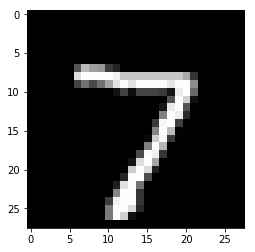

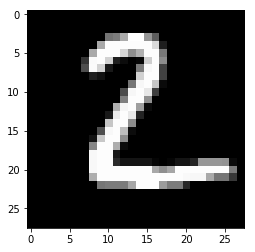

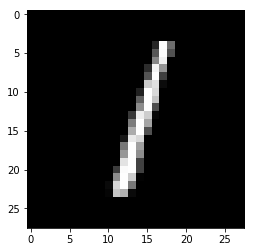

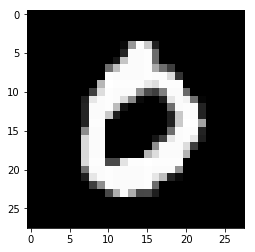

In [48]:
#Show the first 4 images as pictures 
for i in range(0,4):   
    image = X_test[i]   
    image = np.array(image, dtype='float')   
    pixels = image.reshape((28,28))  
    plt.imshow(pixels, cmap='gray')   
    plt.show()

**Literature**
* https://itnext.io/classify-hand-written-digits-using-python-and-convolutional-neural-networks-26ccfc06b95c
* https://habr.com/ru/post/318970/
* https://keras.io/layers/core/
* https://keras.io/optimizers/
* https://keras.io/losses/
* https://keras.io/activations/